In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df.columns


Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [ ]:
from pandas import json_normalize

df_norm = pd.json_normalize(df.to_dict(orient="records"))

df_norm.tail()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
df_norm.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
df_norm.columns=df_norm.columns.str.lower()

In [ ]:
df_norm

,customerid,churn,customer.gender,customer.seniorcitizen,customer.partner,customer.dependents,customer.tenure,phone.phoneservice,phone.multiplelines,internet.internetservice,...,internet.onlinebackup,internet.deviceprotection,internet.techsupport,internet.streamingtv,internet.streamingmovies,account.contract,account.paperlessbilling,account.paymentmethod,account.charges.monthly,account.charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df_norm.isnull().sum().sort_values(ascending=False)


,0
customerid,0
churn,0
customer.gender,0
customer.seniorcitizen,0
customer.partner,0
customer.dependents,0
customer.tenure,0
phone.phoneservice,0
phone.multiplelines,0
internet.internetservice,0


In [ ]:
df_norm.churn.unique()


array(['No', 'Yes', ''], dtype=object)

In [ ]:
import numpy as np

vacios = df_norm.isnull().sum() + (df_norm == "").sum() + (df_norm == " ").sum()
vacios[vacios > 0]


,0
churn,224
account.charges.total,11


In [ ]:
df_norm = df_norm.replace(" ", np.nan)
df_norm = df_norm.replace("", np.nan)


In [ ]:
df_norm.isnull().sum()


,0
customerid,0
churn,224
customer.gender,0
customer.seniorcitizen,0
customer.partner,0
customer.dependents,0
customer.tenure,0
phone.phoneservice,0
phone.multiplelines,0
internet.internetservice,0


In [ ]:
df_norm['account.charges.total'] = df_norm['account.charges.total'].astype(float)
df_norm.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.seniorcitizen     7267 non-null   int64  
 4   customer.partner           7267 non-null   object 
 5   customer.dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.phoneservice         7267 non-null   object 
 8   phone.multiplelines        7267 non-null   object 
 9   internet.internetservice   7267 non-null   object 
 10  internet.onlinesecurity    7267 non-null   object 
 11  internet.onlinebackup      7267 non-null   object 
 12  internet.deviceprotection  7267 non-null   object 
 13  internet.techsupport       7267 non-null   objec

In [ ]:
df_norm['Cuentas_Diarias'] = df_norm['account.charges.monthly'] / 30
df_norm['Cuentas_Diarias'] = df_norm['Cuentas_Diarias'].round(2)
df_norm

,customerid,churn,customer.gender,customer.seniorcitizen,customer.partner,customer.dependents,customer.tenure,phone.phoneservice,phone.multiplelines,internet.internetservice,...,internet.deviceprotection,internet.techsupport,internet.streamingtv,internet.streamingmovies,account.contract,account.paperlessbilling,account.paymentmethod,account.charges.monthly,account.charges.total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [ ]:
df_norm = df_norm.replace({
    'Yes': 1, 'No': 0,
    'yes': 1, 'no': 0
})
df_norm.head()

/tmp/ipython-input-795707657.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_norm = df_norm.replace({


,customerid,churn,customer.gender,customer.seniorcitizen,customer.partner,customer.dependents,customer.tenure,phone.phoneservice,phone.multiplelines,internet.internetservice,...,internet.deviceprotection,internet.techsupport,internet.streamingtv,internet.streamingmovies,account.contract,account.paperlessbilling,account.paymentmethod,account.charges.monthly,account.charges.total,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [ ]:
df_norm = df_norm.rename(columns={
    'customerid': 'id_cliente',
    'churn': 'abandono',

    'customer.gender': 'genero',
    'customer.seniorcitizen': 'adulto_mayor',
    'customer.partner': 'pareja',
    'customer.dependents': 'dependientes',
    'customer.tenure': 'antiguedad',

    'phone.phoneservice': 'servicio_telefono',
    'phone.multiplelines': 'lineas_multiples',

    'internet.internetservice': 'servicio_internet',
    'internet.onlinesecurity': 'seguridad_online',
    'internet.onlinebackup': 'respaldo_online',
    'internet.deviceprotection': 'proteccion_dispositivo',
    'internet.techsupport': 'soporte_tecnico',
    'internet.streamingtv': 'streaming_tv',
    'internet.streamingmovies': 'streaming_peliculas',

    'account.contract': 'tipo_contrato',
    'account.paperlessbilling': 'facturacion_electronica',
    'account.paymentmethod': 'metodo_pago',
    'account.charges.monthly': 'cargo_mensual',
    'account.charges.total': 'cargo_total',

    'Cuentas_Diarias': 'cuentas_diarias'
})


In [ ]:
df_norm.describe()

,abandono,adulto_mayor,pareja,dependientes,antiguedad,servicio_telefono,facturacion_electronica,cargo_mensual,cargo_total,cuentas_diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157292
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


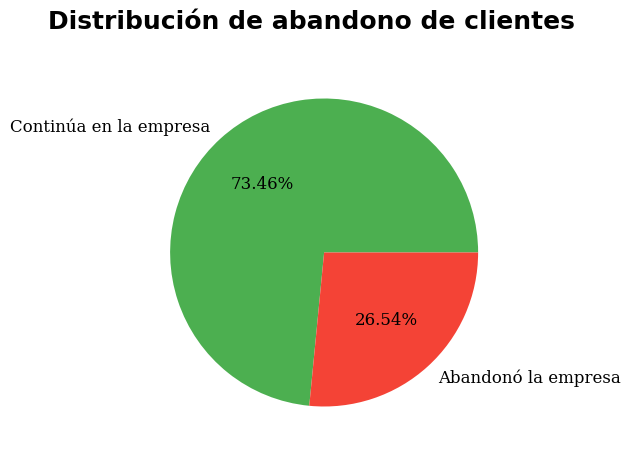

In [ ]:
contador_churn = df_norm['abandono'].value_counts()
contador_churn
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Distribución de abandono de clientes', fontsize=18, fontweight='bold')
colores = ['#4CAF50', '#F44336']
ax.pie(
    contador_churn,
    labels=['Continúa en la empresa', 'Abandonó la empresa'],
    autopct='%0.2f%%',
    textprops={'fontsize': 12, 'fontfamily': 'serif'},
    colors=colores
)
plt.show()

In [ ]:
df_norm.columns


Index(['id_cliente', 'abandono', 'genero', 'adulto_mayor', 'pareja',
       'dependientes', 'antiguedad', 'servicio_telefono', 'lineas_multiples',
       'servicio_internet', 'seguridad_online', 'respaldo_online',
       'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv',
       'streaming_peliculas', 'tipo_contrato', 'facturacion_electronica',
       'metodo_pago', 'cargo_mensual', 'cargo_total', 'cuentas_diarias'],
      dtype='object')

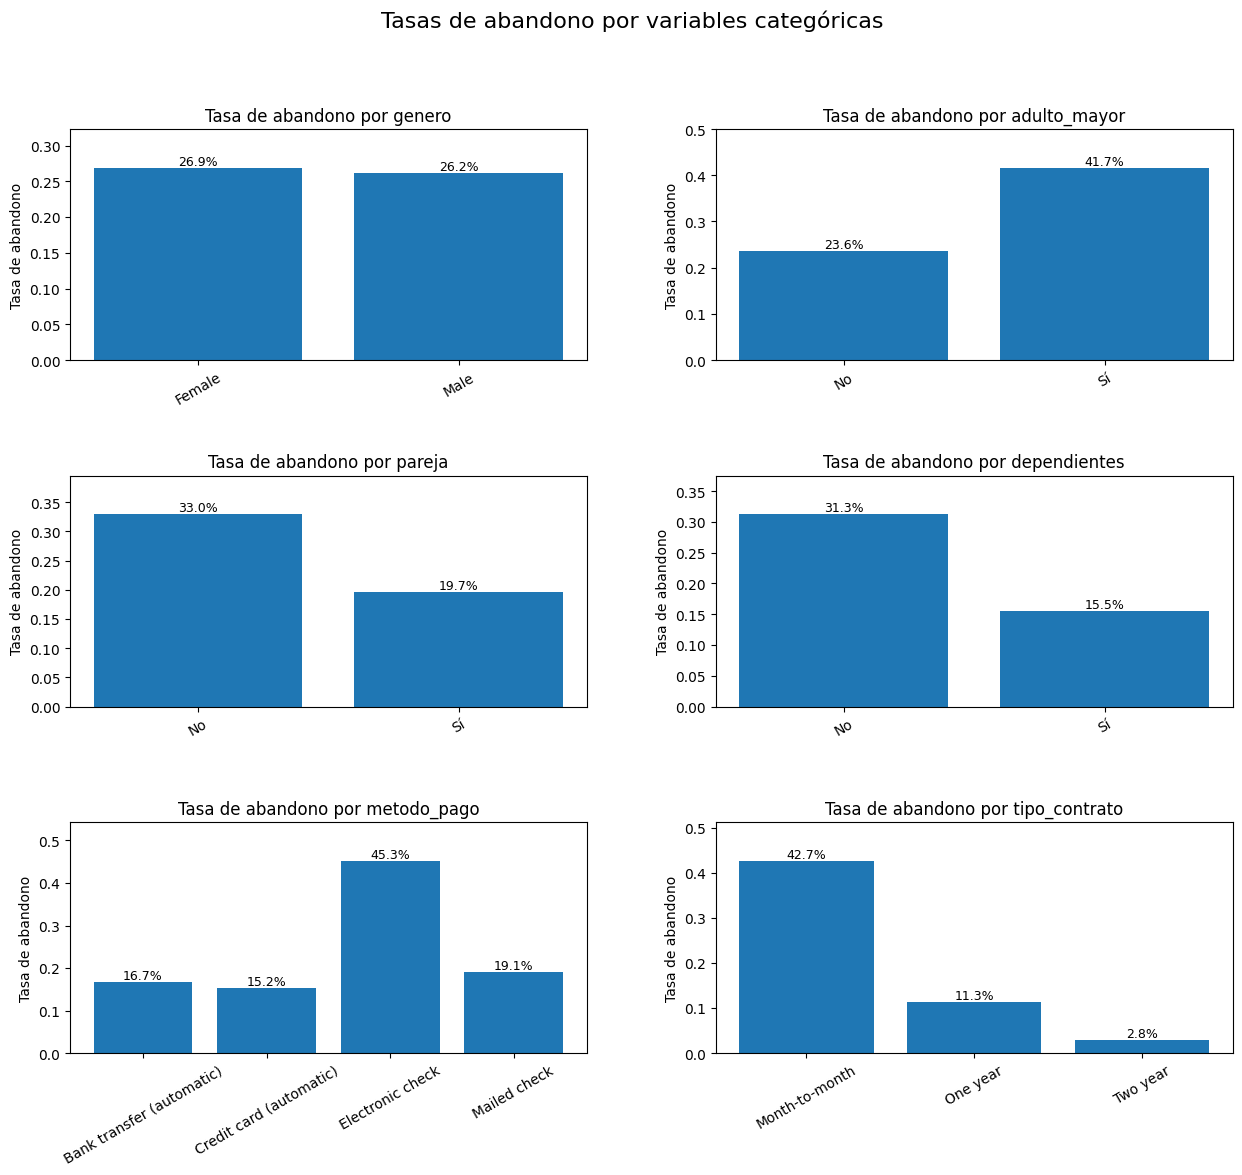

In [ ]:


lista_columnas_categoricas = [
    'genero', 'adulto_mayor', 'pareja',
       'dependientes','metodo_pago','tipo_contrato'
]

fig, ax = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Tasas de abandono por variables categóricas', fontsize=16)
fig.subplots_adjust(wspace=0.25, hspace=0.5)

ax = ax.flatten()

for i, col in enumerate(lista_columnas_categoricas):

    # Calcular promedio de churn por categoría
    promedio = df_norm.groupby(col)['abandono'].mean()

    # Convertir índices a string para poder renombrar etiquetas
    labels = promedio.index.astype(str)

    # Reemplazar 0 y 1 por No y Sí (solo si es binaria)
    labels = ['No' if x == '0' else 'Sí' if x == '1' else x for x in labels]

    # Gráfica de barras
    bars = ax[i].bar(labels, promedio.values)

    # Mostrar porcentaje encima de cada barra
    for bar in bars:
        altura = bar.get_height()
        ax[i].text(
            bar.get_x() + bar.get_width() / 2,
            altura,
            f'{altura*100:.1f}%',
            ha='center', va='bottom',
            fontsize=9
        )

    # Ajustar límite del eje Y
    max_val = promedio.values.max()
    ax[i].set_ylim(0, max_val * 1.2)

    ax[i].set_title(f'Tasa de abandono por {col}')
    ax[i].set_ylabel('Tasa de abandono')
    ax[i].tick_params(axis='x', rotation=30)

plt.show()



In [ ]:

variables_numericas = ['cargo_total', 'antiguedad', 'cargo_mensual']


In [ ]:
tabla_mean = df_norm.groupby('abandono')[variables_numericas].mean().T
tabla_mean.columns = ['No abandonan_promedio', 'Sí abandonan_promedio']

tabla_sum = df_norm.groupby('abandono')[variables_numericas].sum().T
tabla_sum.columns = ['No abandonan_total', 'Sí abandonan_total']

tabla = pd.concat([tabla_mean, tabla_sum], axis=1)

tabla['Diferencia_promedio'] = (
    tabla['Sí abandonan_promedio'] - tabla['No abandonan_promedio']
)

tabla['Diferencia_%'] = (
    tabla['Diferencia_promedio'] / tabla['No abandonan_promedio']
) * 100


In [ ]:
formatos = {
    'No abandonan_promedio': '{:.2f}',
    'Sí abandonan_promedio': '{:.2f}',
    'No abandonan_total': '{:.2f}',
    'Sí abandonan_total': '{:.2f}',
    'Diferencia_promedio': '{:.2f}',
    'Diferencia_%': '{:.2f} %'
}

tabla_estilo = (
    tabla
    .style
    .format(formatos)
    .background_gradient(
        subset=['Diferencia_%'],
        cmap='RdYlGn'
    )
    .set_caption("Tabla comparativa: abandono vs no abandono")
    .set_properties(**{'text-align': 'center'})
)

tabla_estilo





,No abandonan_promedio,Sí abandonan_promedio,No abandonan_total,Sí abandonan_total,Diferencia_promedio,Diferencia_%
cargo_total,2555.34,1531.80,13193241.80,2862926.90,-1023.55,-40.06 %
antiguedad,37.57,17.98,194387.00,33603.00,-19.59,-52.14 %
cargo_mensual,61.27,74.44,316985.75,139130.85,13.18,21.51 %


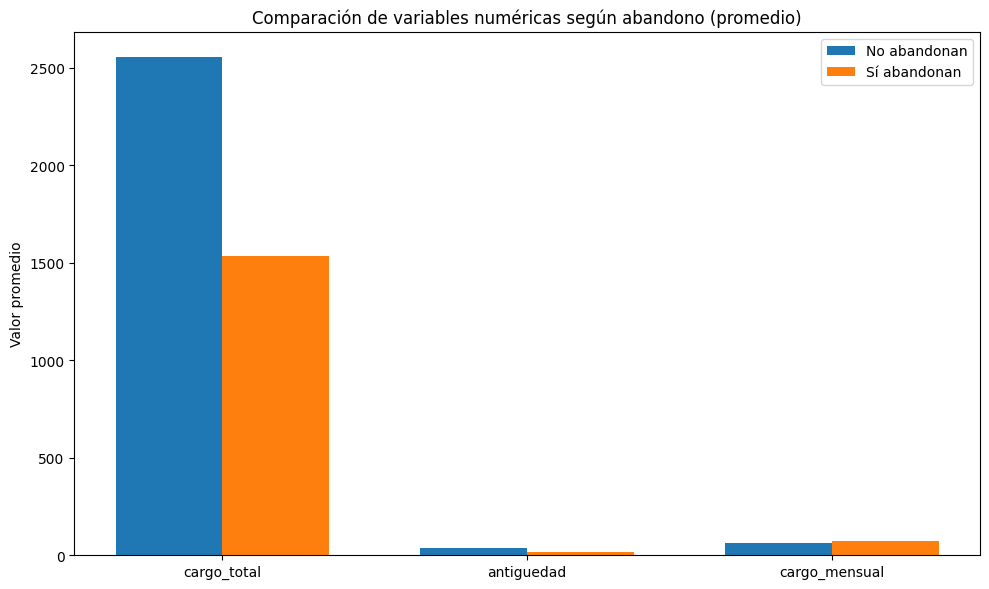

In [ ]:


tabla_plot = tabla[['No abandonan_promedio', 'Sí abandonan_promedio']]

fig, ax = plt.subplots(figsize=(10,6))

x = np.arange(len(tabla_plot.index))
width = 0.35

ax.bar(x - width/2, tabla_plot['No abandonan_promedio'], width, label='No abandonan')
ax.bar(x + width/2, tabla_plot['Sí abandonan_promedio'], width, label='Sí abandonan')

ax.set_xticks(x)
ax.set_xticklabels(tabla_plot.index)
ax.set_ylabel('Valor promedio')
ax.set_title('Comparación de variables numéricas según abandono (promedio)')
ax.legend()

plt.tight_layout()
plt.show()



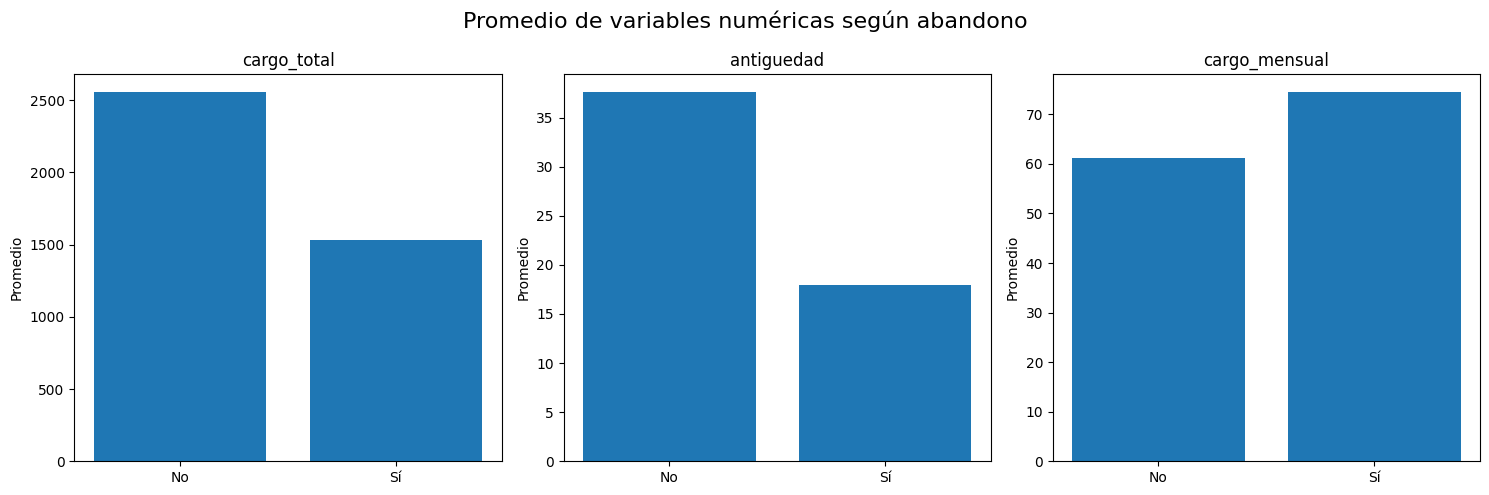

In [ ]:


fig, axes = plt.subplots(1, len(variables_numericas), figsize=(15,5))
fig.suptitle('Promedio de variables numéricas según abandono', fontsize=16)

for i, var in enumerate(variables_numericas):
    valores = df_norm.groupby('abandono')[var].mean()

    axes[i].bar(['No', 'Sí'], valores)
    axes[i].set_title(var)
    axes[i].set_ylabel('Promedio')

plt.tight_layout()
plt.show()



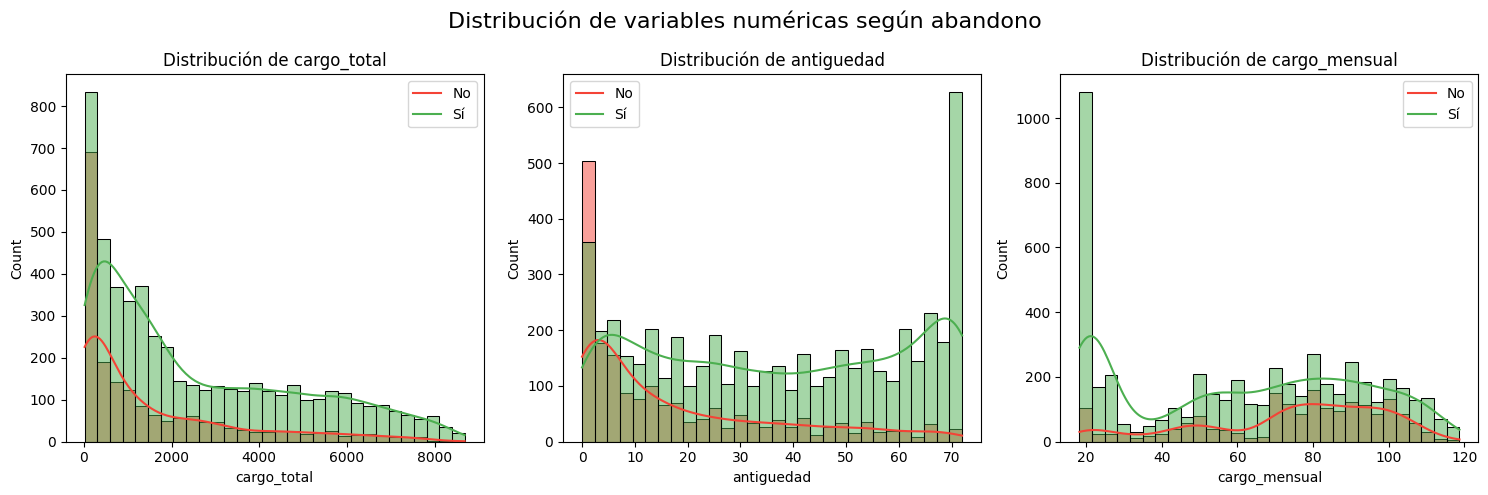

In [ ]:
fig, axes = plt.subplots(1, len(variables_numericas), figsize=(15,5))
fig.suptitle('Distribución de variables numéricas según abandono', fontsize=16)

for i, var in enumerate(variables_numericas):
    sns.histplot(
    data=df_norm,
    x=var,
    hue='abandono',
    bins=30,
    kde=True,
    palette=colores,
    ax=axes[i])

    axes[i].set_title(f'Distribución de {var}')
    axes[i].legend(['No', 'Sí'])

plt.tight_layout()
plt.show()


Informe Final – Análisis de Evasión de Clientes (Churn)
1. Introducción

El presente informe tiene como objetivo analizar el fenómeno de evasión de clientes (churn), entendida como la decisión de un cliente de abandonar el servicio ofrecido por la empresa. La evasión representa un problema estratégico, ya que adquirir nuevos clientes suele ser más costoso que retener a los existentes. Por esta razón, identificar patrones, variables asociadas y posibles factores de riesgo resulta clave para diseñar estrategias de retención más efectivas.

En este notebook se desarrolla un análisis exploratorio de datos que permite comparar el comportamiento de los clientes que abandonan frente a aquellos que no abandonan, con el fin de extraer insights accionables que apoyen la toma de decisiones.

2. Limpieza y Tratamiento de Datos

En esta etapa se realizó la preparación del conjunto de datos para garantizar la calidad del análisis. Los principales pasos fueron:

Importación de las librerías necesarias para el análisis de datos y visualización.

Carga del dataset original en un DataFrame de Pandas.

Revisión de la estructura de los datos (tipos de variables, dimensiones y valores nulos).

Tratamiento de valores faltantes y verificación de inconsistencias.

Normalización y/o estandarización de variables numéricas cuando fue necesario.

Separación de las variables numéricas relevantes y creación de la variable objetivo abandono (churn) para comparar ambos grupos.

Estos pasos aseguraron que los datos estuvieran en condiciones adecuadas para realizar análisis estadísticos y visualizaciones confiables.

3. Análisis Exploratorio de Datos (EDA)

El análisis exploratorio se centró en identificar diferencias entre los clientes que abandonan y los que no, utilizando estadísticas descriptivas y visualizaciones.

3.1 Análisis Descriptivo

Se calcularon promedios y totales de las principales variables numéricas, agrupadas por la condición de abandono. Posteriormente, se construyó una tabla comparativa que incluye:

Promedio de cada variable para clientes que abandonan y que no abandonan.

Diferencia absoluta de promedios entre ambos grupos.

Diferencia porcentual, que indica cuánto mayor o menor es el valor promedio en los clientes que abandonan, tomando como referencia a los que no abandonan.

Esta tabla permitió identificar de forma clara qué variables presentan las mayores diferencias relativas entre ambos grupos.

3.2 Visualizaciones

A lo largo del notebook se utilizaron gráficos (barras, comparaciones y escalas de color) para:

Detectar patrones de comportamiento asociados al churn.

Identificar variables con diferencias significativas.

Facilitar la interpretación visual de los resultados, especialmente mediante tablas estilizadas con gradientes de color.

Las visualizaciones refuerzan el análisis numérico y permiten una comprensión más intuitiva de los hallazgos.

4. Conclusiones e Insights

A partir del análisis realizado, se pueden extraer los siguientes hallazgos principales:

Existen variables que muestran diferencias porcentuales relevantes entre clientes que abandonan y los que permanecen, lo que sugiere una posible asociación con la evasión.

En varias variables, los clientes que abandonan presentan valores promedio significativamente menores, lo que podría indicar menor vínculo, menor uso del servicio o menor antigüedad.

En otros casos, se observan valores mayores en los clientes que abandonan, lo que podría estar relacionado con sobrecostos, insatisfacción o características específicas del servicio.

Es importante destacar que estas diferencias no implican causalidad, pero sí permiten identificar factores de riesgo y variables clave que merecen atención.

5. Recomendaciones

Con base en los resultados obtenidos, se proponen las siguientes recomendaciones estratégicas:

Segmentación de clientes: identificar perfiles con mayor riesgo de abandono para aplicar acciones preventivas.

Estrategias de retención temprana: diseñar intervenciones enfocadas en clientes con baja antigüedad o características asociadas al churn.

Monitoreo continuo: dar seguimiento periódico a las variables que presentan mayores diferencias porcentuales.

Análisis predictivo: como paso siguiente, desarrollar modelos de machine learning que permitan predecir la probabilidad de abandono.

Implementar estas acciones puede contribuir significativamente a la reducción de la evasión y a la mejora de la relación con los clientes.

Conclusión final: El análisis exploratorio realizado proporciona una base sólida para comprender el fenómeno del churn y sirve como punto de partida para estrategias de retención más informadas y basadas en datos. 🚀
